## PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

In [362]:
what_were_covering = {  1:"data prepare and load",
                        2:"build model",
                        3:"fitting the model to data (training)",
                        4:"making predictions and evaluating a model (inference)",
                        5:"saving and loading the model",
                        6:"putting it all together"}
what_were_covering

{1: 'data prepare and load',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading the model',
 6: 'putting it all together'}

In [363]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch vesion
torch.__version__

'2.6.0+cu126'

## 1. Data preparation and loading

Data can be almost anything in machine learning
* Excel spreadsheet
* Images of any kind
* Videos 
* Audio
* DNA
* Text

Machine learning is a game of 2 parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [364]:
# Create *known* parameters
weight = 0.9
bias = 0.3

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10], y[:10], len(X), len(y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3180],
        [0.3360],
        [0.3540],
        [0.3720],
        [0.3900],
        [0.4080],
        [0.4260],
        [0.4440],
        [0.4620]]) 50 50


### Splitting data into training and test sets

Let's create a training and test set with our data

In [365]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we visualize our data?

"Visualize, visualize, visualize"

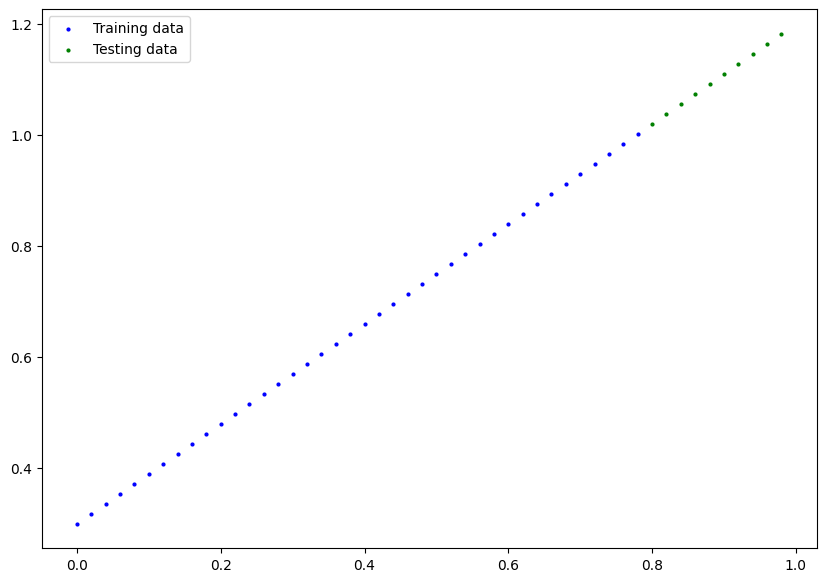

In [366]:
def plot_prediction(train_data, train_labels, test_data,test_labels, predictions = None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # PLot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predicitons?
    if predictions is not None:
        # Plot predictions if they exists
        plt.scatter(test_data, predictions, c= "r", s = 4, label="Predicitions")

    # Show the legends
    plt.legend()


plot_prediction(X_train, y_train, X_test, y_test)


## 2. Build model

First PyTorch model

Python classes (OOP): https://realpython.com/python3-object-oriented-programming/


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values 

How does it do so?

Through 2 main algorithms:
1. Gradient descent
2. Backpropagation

In [367]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) # requires_grad = True by default
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define the computation in the model (every class that inherits nn.Module must ovverride that)
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # Linear regression formula


### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (nn can be considered a computational graph)
* torch.nn.Parametere - what parameteres should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Moduel - The base class for all nerual network moduels, if you inherit it, you should override forward
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

ref: pytorch docs cheatsheet

### Checking the contents of our PyTorch model

Now we've created the model let's see what is inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [368]:
# Create a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# CReate and instance of the model (this is a sublclass of nn.Module)
model_0 = LinearRegressionModel() 

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [369]:
# List name parameters
print(model_0.state_dict())

weight, bias

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


(0.9, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's seee how well it predicts `y_test` on `X_test`

When we pass data through out model, it's going to run it throuhg the `forward()`

In [370]:
# This is slower
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [371]:
# use this for inference
with torch.inference_mode():
    y_preds = model_0(X_test)

#similar, but worse, inference mode is better
with torch.no_grad():
    y_preds = model_0(X_test)

y_preds 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

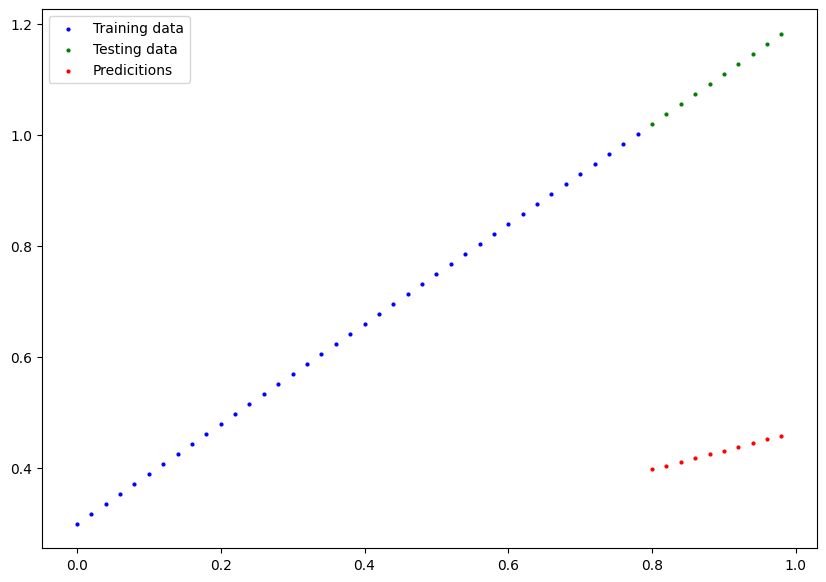

In [372]:
#Basically random predictions
plot_prediction(X_train, y_train, X_test, y_test, y_preds)

## 3. Train model

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters

From a poor represenation of the data to a better representation

One way to measure how wrong your model's predictions are is to use a loss/cost function (criterion).

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictoins are to the ideal outputs.
* **Optimizer:** Takes into account the loss of a model and adjusts the models parameters (e.g. weight and bias values) to improve the loss function. 

And specificall for PyTorch we need:
* A training loop
* A testing loop


In [373]:
# Check out the models parameters (a parameter is a value theat the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Which optimizer
* regression : ex. SGD
* classification :  ex. BCEloss

In [374]:
# Setup a loss function 
loss_fn = nn.L1Loss()

# Setup an optimizer, you have to often set the params and the learning rate
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.01) #lr = learning rate (important hyperparameter, you can set), larger learning rate, larger change in the parameter


### Building a training (and testing) loop in PyTorch

A couple of things we need in a training loop:

0. Loop through the data 
1. Forward pass/propagation to make predictions on data(this involves data moving through model's `forward()` functions) 
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust out model's parameters to try and improve the loss (**gradient descent**)

learning rate scheduling - make smaller steps as you are closer to the minimum

In [375]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we have set it ourselves)
epochs = 200

# Tracking experiments
epoch_count = []
loss_values = []
test_loss_values = []

### Traning
# 0. Looop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode sets all paramters that require gradients to have gradients

    # 1. Forward pass (calling the implemented forward() function)
    y_pred = model_0(X_train) 

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    #print(f"loss = {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop... we have to zero them above in step 3 for the next iteration
    

    ### Testing 
    model_0.eval() # turns off  stuff no needed for evaluation/testing (dropout layers, batch norm (normalizations layers))
    with torch.inference_mode(): # turns of gradient tracking and a couple more things - look at pytorch tweet, torch.no_grad() also in older code
        
        # 1. Do the forward pass  call the implemented forward() function
        test_pred = model_0(X_test)
        # 2. Calculate the loss
        test_loss = loss_fn(y_test, test_pred)

        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

    # print out what is happening
    if epoch %10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())


Epoch: 0 | Loss: 0.39088135957717896 | Test loss: 0.6590651273727417
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.2756713330745697 | Test loss: 0.5243551731109619
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.16460572183132172 | Test loss: 0.3926808834075928
OrderedDict([('weights', tensor([0.4186])), ('bias', tensor([0.3358]))])
Epoch: 30 | Loss: 0.10852336883544922 | Test loss: 0.2989806532859802
OrderedDict([('weights', tensor([0.4547])), ('bias', tensor([0.3973]))])
Epoch: 40 | Loss: 0.08743593096733093 | Test loss: 0.24060264229774475
OrderedDict([('weights', tensor([0.4849])), ('bias', tensor([0.4288]))])
Epoch: 50 | Loss: 0.07890808582305908 | Test loss: 0.2049684077501297
OrderedDict([('weights', tensor([0.5098])), ('bias', tensor([0.4423]))])
Epoch: 60 | Loss: 0.07424997538328171 | Test loss: 0.18382307887077332
OrderedDict([('weights', tensor([0.5308])), ('bias', tensor([0.4448]))])

C:\Users\marko\AppData\Local\Temp\ipykernel_10068\1584308914.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  loss_values = np.array(torch.tensor(loss_values))


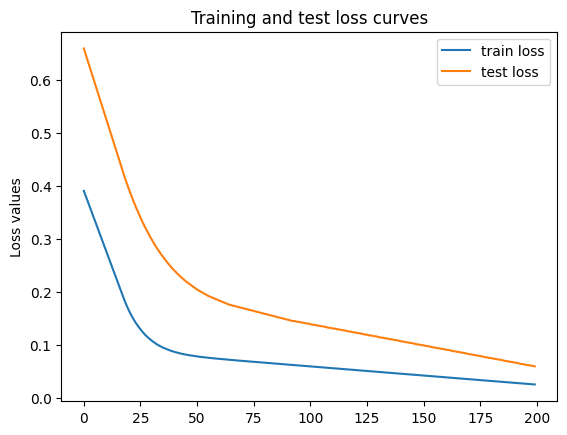

In [376]:
import numpy as np
loss_values = np.array(torch.tensor(loss_values))

# Plot the loss curves
plt.plot(epoch_count, loss_values, label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss values")
plt.legend()

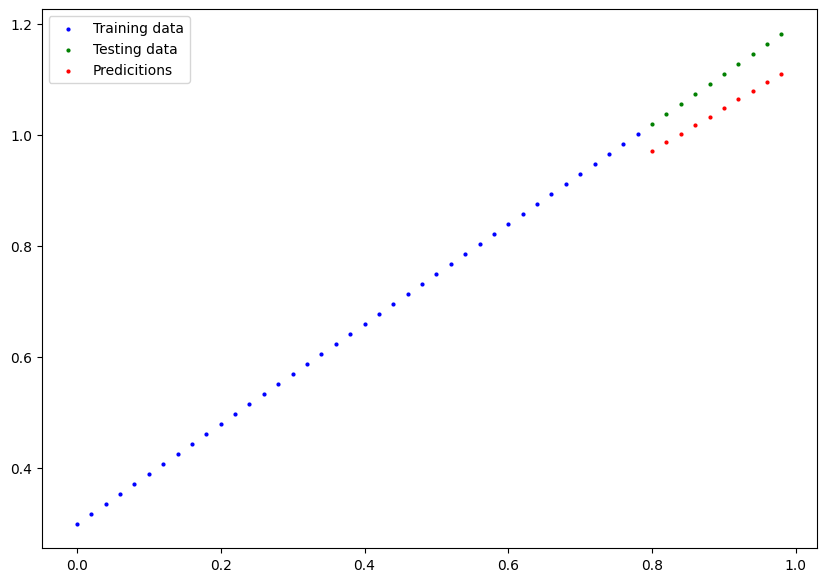

In [377]:
# Predictions 
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_prediction(X_train, y_train, X_test, y_test, y_preds_new)

## Saving a model in PyTorch

There are 3 main methods you should know about for saving and loading models in PyTorch

1. `torch.save()` - save an object in Python pickle format
2. `torch.load()` - allowss you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

Look at Pytorch docs - save and load models

In [378]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow.pth" #.pth or .pt is for pytorch objects (convention)
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow.pth


## Loading our PyTorch model 

Since we saved our model's `state_dict()` we need to create a new instance of out model class and load the saved `state_dict()` into that

In [379]:
# Loading our PyTorch model 

# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state dict of model_0 (this will update the new instance with the updated parameters)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [380]:
# Make some preditions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_test)
    y_preds = model_0(X_test)
    
loaded_model_0_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together
Let's go back through the steps above and see it all in one place

In [381]:
# Import PyTorch and matplotlib
import torch
import matplotlib.pyplot as plt
from torch import nn

# Check PyTorch version
torch.__version__

'2.6.0+cu126'

Create device-agnostic code

This meand if we've got access to a GPU our code will use it (for faster computed)

In [382]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [383]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.1
bias = 0.5

# Create range values
X = torch.arange(0,1,0.005).unsqueeze(dim=1)
y = weight*X + bias

In [384]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

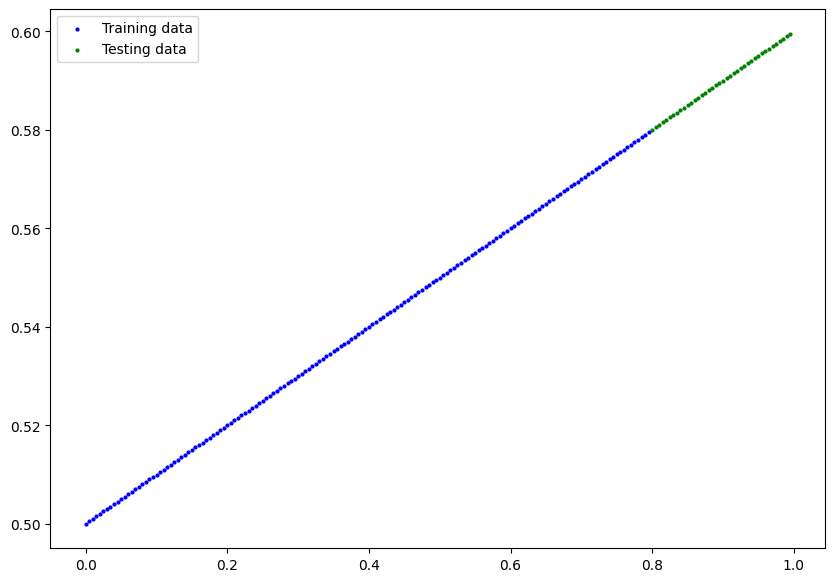

In [385]:
# Plot the data
plot_prediction(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

In [386]:
# Create a linear model by subclassin nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() dor creating the model parameters / also called linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1) # input of size 1 and output of size 1

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

### 6.3 Traning the model

In [387]:
# Check the model device
next(model_1.parameters()).device

device(type='cpu')

In [388]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Traning

For traninig we need a loss function, and optimizer, a training looop and a testing loop

In [389]:
# Loss function
loss_fun = torch.nn.L1Loss() # MAE loss (mean absolute error)

# Optimizer
optimizer = torch.optim.SGD( params=model_1.parameters(),lr=0.001)

In [396]:
# Training looop
torch.manual_seed(3)

epochs = 1000

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2.Calculate the loss
    loss = loss_fun(y_pred, y_train)

    # 3. Zero grad
    optimizer.zero_grad()

    # 4. backprop
    loss.backward()

    # 5.Optimizer step
    optimizer.step()

    ### Testing 
    model_1.eval()
    with torch.inference_mode():
        y_pred_test = model_1(X_test)
        loss_test = loss_fun( y_test,y_pred_test)

    # Print out what is happening 
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {loss_test}")

Epoch: 0 | Loss: 0.03414551168680191 | Test loss: 0.08020281046628952
Epoch: 10 | Loss: 0.03380350396037102 | Test loss: 0.07940097898244858
Epoch: 20 | Loss: 0.03346149995923042 | Test loss: 0.07859916985034943
Epoch: 30 | Loss: 0.03311949595808983 | Test loss: 0.07779734581708908
Epoch: 40 | Loss: 0.032777488231658936 | Test loss: 0.07699551433324814
Epoch: 50 | Loss: 0.032435476779937744 | Test loss: 0.07619369775056839
Epoch: 60 | Loss: 0.032093487679958344 | Test loss: 0.07537459582090378
Epoch: 70 | Loss: 0.03175150975584984 | Test loss: 0.07457277923822403
Epoch: 80 | Loss: 0.03140949830412865 | Test loss: 0.07377095520496368
Epoch: 90 | Loss: 0.031067494302988052 | Test loss: 0.07296913117170334
Epoch: 100 | Loss: 0.03072548471391201 | Test loss: 0.072167307138443
Epoch: 110 | Loss: 0.030383480712771416 | Test loss: 0.07136549055576324
Epoch: 120 | Loss: 0.030041471123695374 | Test loss: 0.0705636665225029
Epoch: 130 | Loss: 0.029699474573135376 | Test loss: 0.06974456459283829

In [393]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2699]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4278], device='cuda:0'))])

In [397]:
# Turn model to eval mode
model_1.eval()

with torch.inference_mode():
    y_pred_test = model_1(X_test)

C:\Users\marko\AppData\Local\Temp\ipykernel_10068\1956628587.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  plot_prediction(np.array(X_train.cpu()), np.array(y_train.cpu()), np.array( X_test.cpu()), np.array(y_test.cpu()), np.array(y_pred_test.cpu() ) )


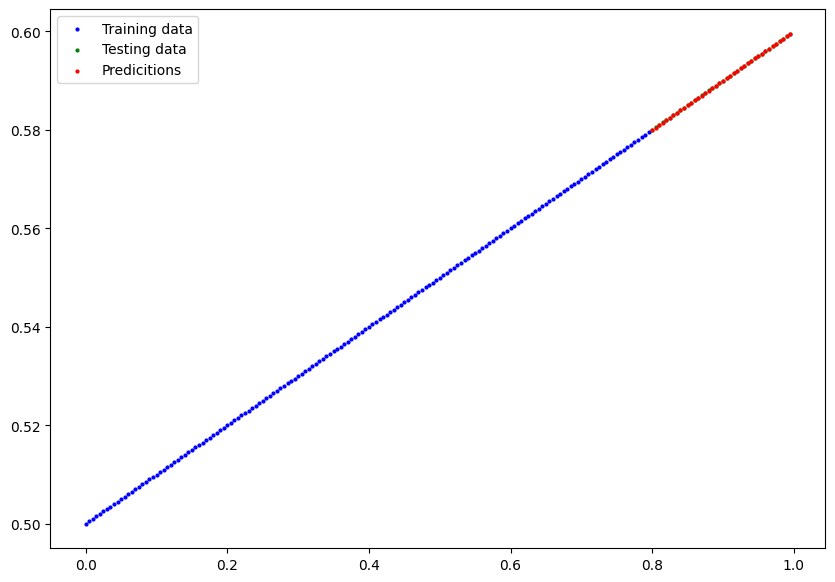

In [398]:
plot_prediction(np.array(X_train.cpu()), np.array(y_train.cpu()), np.array( X_test.cpu()), np.array(y_test.cpu()), np.array(y_pred_test.cpu() ) )

### 6.5 Saving and loading a saved model

In [400]:
# Save the model

# Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = Path("01_pytorch_workflow_model_1.pth")
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

In [405]:
# Loading the model
model_1_reloaded = LinearRegressionModelV2()
model_1_reloaded.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to the device
model_1_reloaded.to(device)
next(model_1_reloaded.parameters()).device


device(type='cuda', index=0)

In [408]:
# Inference 
model_1_reloaded.eval()
with torch.inference_mode():
    preds = model_1_reloaded(X_test)

y_pred_test == preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercise

In [288]:
# Data
X = torch.arange(0.01,1, 0.01, dtype=torch.float32)
weight = 0.5
bias = 0.4
y = weight * X + bias

# Split the data 
split = int(0.8 * len(X))
X_test = X[split:]
y_test= y[split:]

X_train = X[:split]
y_train = y[:split]

In [289]:
# Make the class of the model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype = torch.float32))

#:torch.Tensor is a hint of the type of parameter, likewise -> is a hint of what will be returned
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x  + self.bias
        

In [290]:
# Initialize the model
model = LinearRegression() 

# Initialize the loss function and optimizer
loss_f = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [291]:
# Training the model
epochs = 1000

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)

    loss = loss_f(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # testing
    model.eval()
    y_new_pred = model(y_test)
    loss_test = loss_f(y_new_pred, y_test)


    print(loss)
    print(loss_test)
    print("\n")

tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.0001, grad_fn=<MseLossBackward0>)


tensor(0.0151, grad_fn=<MseLossBackward0>)
tensor(0.0002, grad_fn=<MseLossBackward0>)


tensor(0.0147, grad_fn=<MseLossBackward0>)
tensor(0.0003, grad_fn=<MseLossBackward0>)


tensor(0.0143, grad_fn=<MseLossBackward0>)
tensor(0.0003, grad_fn=<MseLossBackward0>)


tensor(0.0139, grad_fn=<MseLossBackward0>)
tensor(0.0004, grad_fn=<MseLossBackward0>)


tensor(0.0135, grad_fn=<MseLossBackward0>)
tensor(0.0005, grad_fn=<MseLossBackward0>)


tensor(0.0131, grad_fn=<MseLossBackward0>)
tensor(0.0006, grad_fn=<MseLossBackward0>)


tensor(0.0128, grad_fn=<MseLossBackward0>)
tensor(0.0007, grad_fn=<MseLossBackward0>)


tensor(0.0125, grad_fn=<MseLossBackward0>)
tensor(0.0009, grad_fn=<MseLossBackward0>)


tensor(0.0122, grad_fn=<MseLossBackward0>)
tensor(0.0010, grad_fn=<MseLossBackward0>)


tensor(0.0119, grad_fn=<MseLossBackward0>)
tensor(0.0011, grad_fn=<MseLossBackward0>)


tensor(0.0116, grad_fn=<MseLossB

In [292]:
# Saving the model
from pathlib import Path
torch.save(model.state_dict(), Path("models/01_model.pth"))



## More exercises 

For exercises refer to learpytorch.io